<a href="https://colab.research.google.com/github/nithyasaisiddiraju/CreditCardFraudDetection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name : Credit Card Fraud Detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score

importing all the necessary libraries

In [ ]:
from sklearn.ensemble import IsolationForest

from sklearn.svm import OneClassSVM

In [ ]:
df= pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


Data analysis and pre processing

In [ ]:
df.shape

(166510, 31)

check is we have any null values

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

replacing all null values with medians of respective columns

In [ ]:
cols=df.columns
cols.delete(-1)
for x in cols:
  if df[x].isna().sum()!=0:
    print(x)
    df[x].fillna(df[x].median(),inplace=True)

df.isna().sum()

V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
Amount
Class


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
from pandas.io.formats.format import ColspaceArgType
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
required_cols=ColspaceArgType



Plotting the distribution

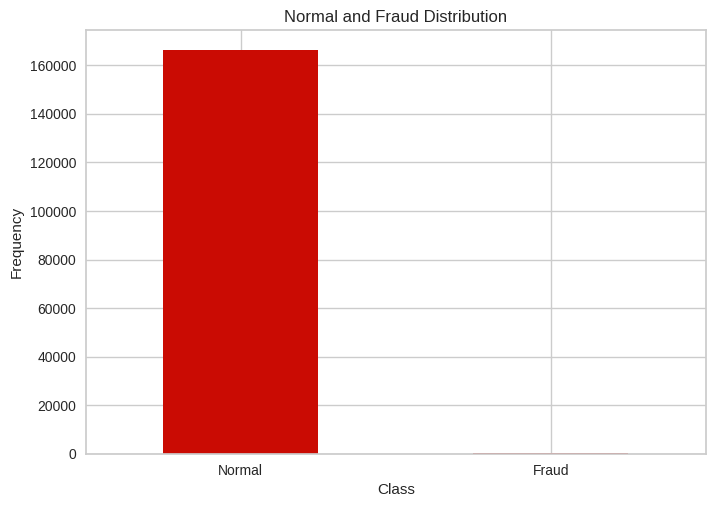

In [ ]:
fraud_check = pd.value_counts(df['Class'], sort = True)
fraud_check.plot(kind = 'bar', rot=0, color= 'r')
plt.title("Normal and Fraud Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
 ## Defining labels to replace our 0 and 1 valuelabels= ['Normal','Fraud']
## mapping those labels
plt.xticks(range(2), ['Normal','Fraud'])
plt.show()


checking the shape of each class

In [ ]:
fraud_people = df[df['Class']==1]
normal_people = df[df['Class']==0]

In [ ]:
fraud_people.shape

(358, 31)

In [ ]:
normal_people.shape

(166152, 31)

Finding out the avg amount in our both the data sets

In [ ]:
fraud_people['Amount'].describe()

count     358.000000
mean      111.608492
std       227.944683
min         0.000000
25%         1.000000
50%        10.685000
75%       101.500000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
normal_people['Amount'].describe()

count    166152.000000
mean         86.859247
std         243.332685
min           0.000000
25%           5.400000
50%          21.500000
75%          76.070000
max       19656.530000
Name: Amount, dtype: float64

####analyzing  it visually

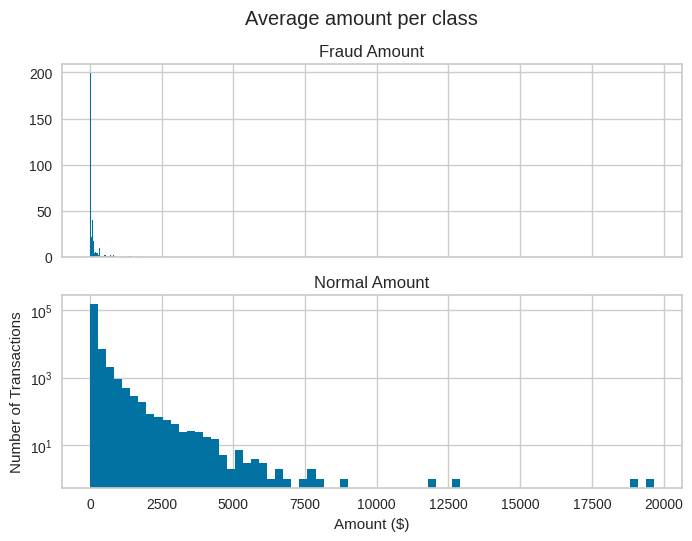

In [ ]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex= True)
graph.suptitle('Average amount per class')
bins = 70

plot1.hist(fraud_people['Amount'] , bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(normal_people['Amount'] , bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

#### Plotting a corr Heatmap

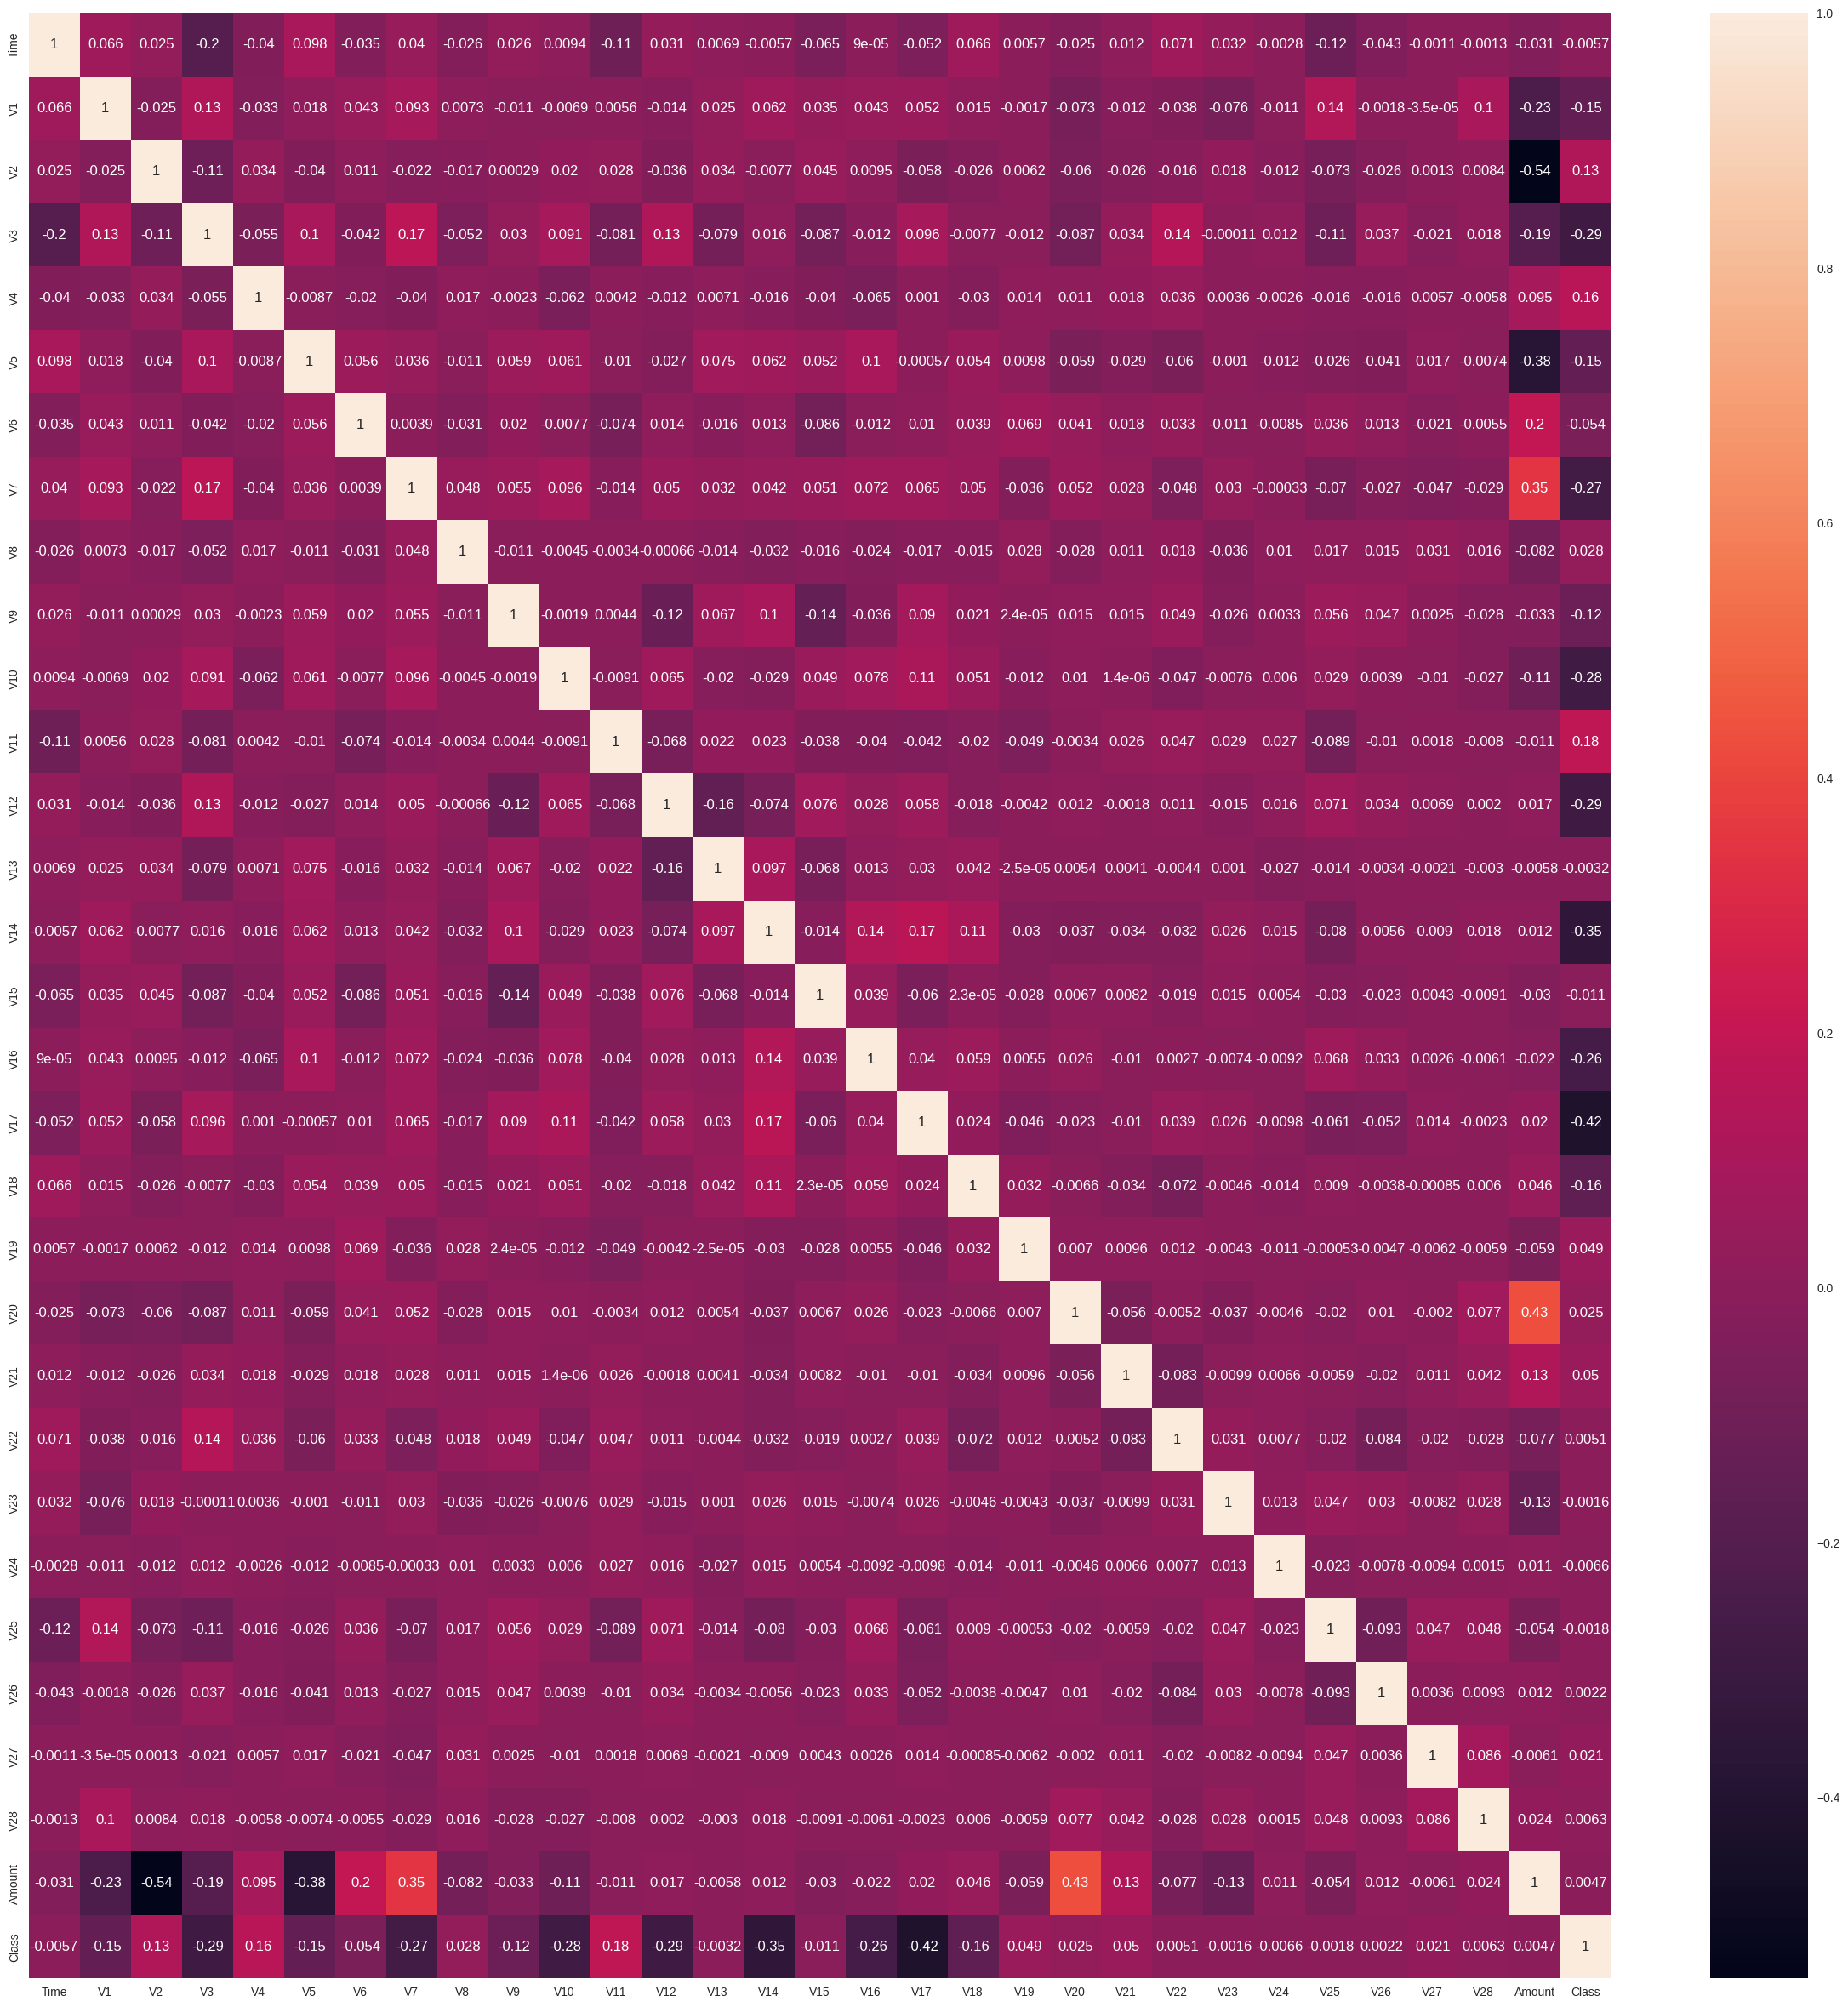

In [ ]:
df.corr()
plt.figure(figsize=(30,30))
g=sns.heatmap(df.corr(),annot=True)

In [ ]:
columns = df.columns.tolist()
# Making our Independent Features
columns = [var for var in columns if var not in ["Class"]]
# Making our Dependent Variable
target = "Class"
x= df[columns]
y= df[target]

In [ ]:
x.shape

(166510, 30)

In [ ]:
y.shape

(166510,)

In [ ]:
x.head() ## Independent Variable

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
y.head() 
y.value_counts()

0.0    166152
1.0       358
Name: Class, dtype: int64

### Splitting the data

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

### We wil be using the following Models for our Anamoly Detection:
- Isolation Forest
- OneClassSVM
- Local outlier factor
- Sequential neural network

## Isolation Forest

In [ ]:
iso_forest= IsolationForest(n_estimators=100, max_samples=len(x_train),random_state=0, verbose=0)                        

In [ ]:
iso_forest.fit(x_train,y_train)

IsolationForest(bootstrap=False, contamination='auto', max_features=1.0,
                max_samples=133208, n_estimators=100, n_jobs=None,
                random_state=0, verbose=0, warm_start=False)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=2)
x_train_new = selector.fit_transform(x_train, y_train)
x_test_new = selector.transform(x_test)

In [ ]:
ypred= iso_forest.predict(x_test)

In [ ]:
iso_forest.fit(x_train_new,y_train)
y_pred_new=iso_forest.predict(x_test_new)


In [ ]:
y_pred_new

#print(accuracy_score(y_test,y_pred_new))

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
ypred

array([1, 1, 1, ..., 1, 1, 1])

#### Mapping the values as we want to have an output in 0 and 1

In [ ]:
ypred[ypred == 1] = 0
ypred[ypred == -1] = 1
y_pred_new[y_pred_new == 1] = 0
y_pred_new[y_pred_new == -1] = 1


### Accuracy score and Matrix

In [ ]:
print(accuracy_score(y_test,ypred))

0.9972674313855023


In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33233
         1.0       0.40      0.61      0.48        69

    accuracy                           1.00     33302
   macro avg       0.70      0.80      0.74     33302
weighted avg       1.00      1.00      1.00     33302



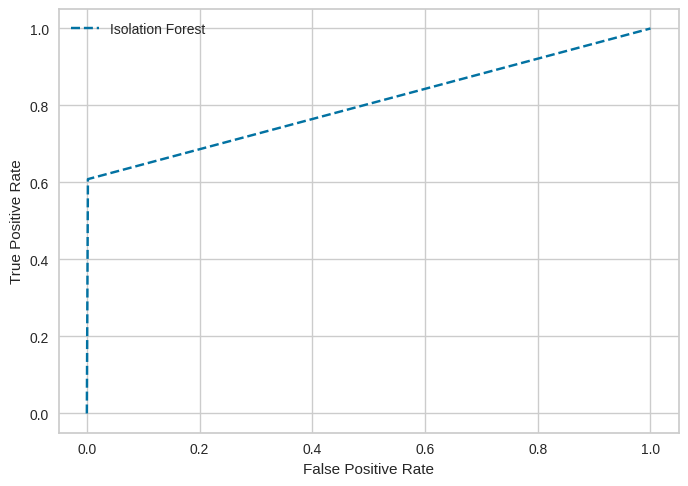

AUROC score: 0.8033849277630014


In [ ]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from matplotlib import pyplot

iso_auc = roc_auc_score(y_test, ypred)
iso_fpr, iso_tpr, thres = roc_curve(y_test, ypred)

pyplot.plot(iso_fpr, iso_tpr,linestyle='--', label='Isolation Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print("AUROC score:", iso_auc)

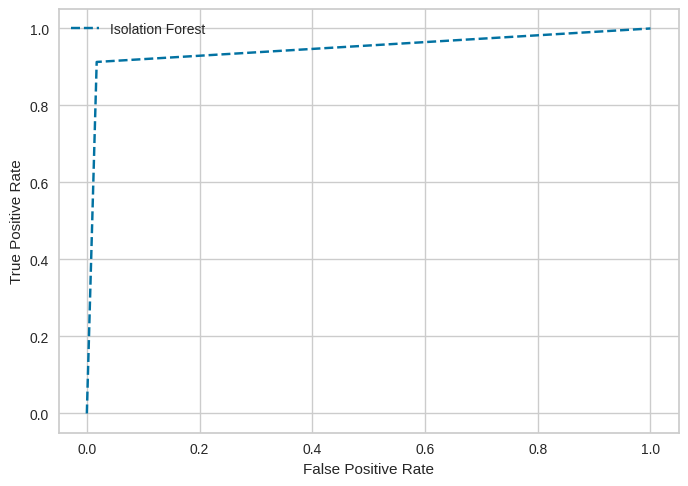

AUROC score: 0.9477804277832799


In [ ]:
iso_auc = roc_auc_score(y_test, y_pred_new)
iso_fpr, iso_tpr, thres = roc_curve(y_test, y_pred_new)

pyplot.plot(iso_fpr, iso_tpr,linestyle='--', label='Isolation Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print("AUROC score:", iso_auc)3


In [ ]:
from sklearn.metrics import confusion_matrix,auc

In [ ]:
confusion_matrix(y_test, ypred)

array([[33169,    64],
       [   27,    42]])

 printing how many errors our model have

In [ ]:
n_errors = (ypred != y_test).sum()
print("Isolation Forest have {} errors.".format(n_errors))

Isolation Forest have 91 errors.


## OneClassSVM

In [ ]:
svm= OneClassSVM(kernel='rbf')

In [ ]:
svm.fit(x_train,y_train)

OneClassSVM(cache_size=200, coef0=0.0, degree=3, gamma='scale', kernel='rbf',
            max_iter=-1, nu=0.5, shrinking=True, tol=0.001, verbose=False)

In [ ]:
ypred1= svm.predict(x_test)

#### Here also we do the same thing as above, mapping our results in 0 and 1

In [ ]:
ypred1[ypred1 == 1] = 0
ypred1[ypred1 == -1] = 1

In [ ]:
print(accuracy_score(y_test,ypred))

0.9972674313855023


In [ ]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     33233
         1.0       0.40      0.61      0.48        69

    accuracy                           1.00     33302
   macro avg       0.70      0.80      0.74     33302
weighted avg       1.00      1.00      1.00     33302



In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, ypred)

array([[33169,    64],
       [   27,    42]])

In [ ]:
n_errors = (ypred1 != y_test).sum()
print("SVM have {} errors.".format(n_errors))

SVM have 16811 errors.


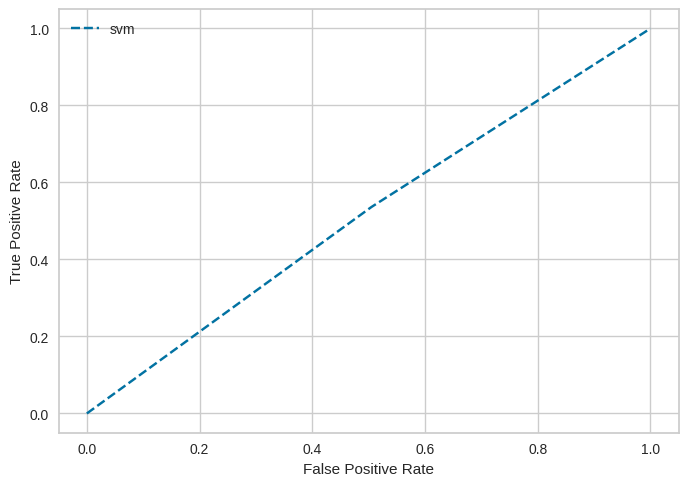

AUROC score: 0.5156710830033183


In [ ]:
svm_auc = roc_auc_score(y_test, ypred1)
svm_fpr, svm_tpr, thres = roc_curve(y_test, ypred1)

pyplot.plot(svm_fpr, svm_tpr,linestyle='--', label='svm')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()
print("AUROC score:", svm_auc)

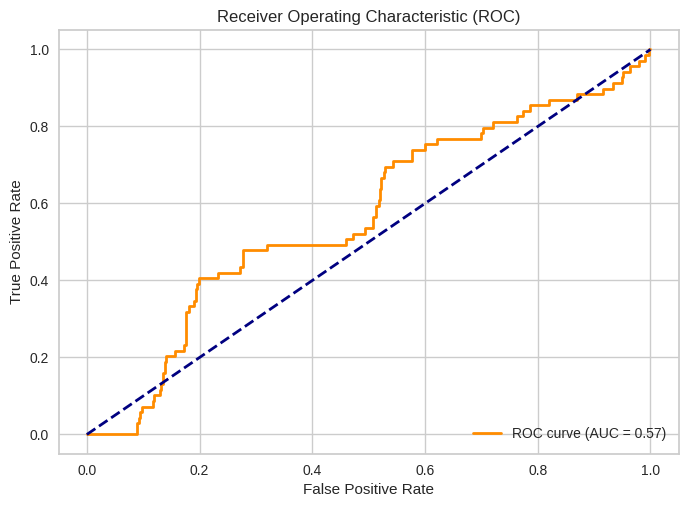

In [ ]:
y_score = -svm.decision_function(x_test)

# compute the false positive rate and true positive rate at different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

**Code for Local outlier factor**

shape: (33302,)
errors:  33239


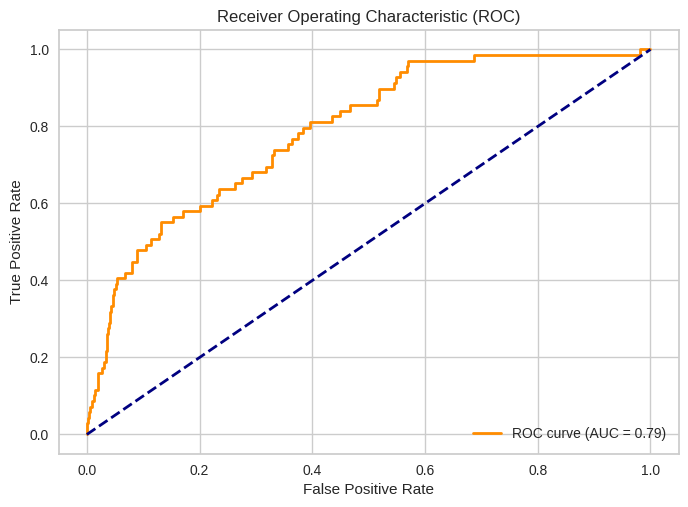

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# define the LOF model with n_neighbors=20 and a contamination rate of 0.01
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01,novelty=True)

# fit the model to the training data
lof.fit(x_train)

# predict the anomaly scores for the test data
y_score = -lof.decision_function(x_test)
y_pred=lof.predict(x_test)
print("shape:",y_test.shape)
print("errors: ",(y_pred!=y_test).sum())

# compute the false positive rate and true positive rate at different thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# compute the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout


# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model
score = model.evaluate(x_test, y_test, batch_size=32)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Epoch 1/10
4163/4163 [==============================] - 13s 3ms/step - loss: 16.3684 - accuracy: 0.9944 - val_loss: 0.0202 - val_accuracy: 0.9979
Epoch 2/10
4163/4163 [==============================] - 11s 3ms/step - loss: 0.1728 - accuracy: 0.9973 - val_loss: 0.0174 - val_accuracy: 0.9979
Epoch 3/10
4163/4163 [==============================] - 12s 3ms/step - loss: 0.0684 - accuracy: 0.9977 - val_loss: 0.0150 - val_accuracy: 0.9979
Epoch 4/10
4163/4163 [==============================] - 11s 3ms/step - loss: 0.0266 - accuracy: 0.9978 - val_loss: 0.0149 - val_accuracy: 0.9979
Epoch 5/10
4163/4163 [==============================] - 11s 3ms/step - loss: 0.0421 - accuracy: 0.9978 - val_loss: 0.0149 - val_accuracy: 0.9979
Epoch 6/10
4163/4163 [==============================] - 12s 3ms/step - loss: 0.0528 - accuracy: 0.9977 - val_loss: 0.0149 - val_accuracy: 0.9979
Epoch 7/10
4163/4163 [==============================] - 12s 3ms/step - loss: 0.0314 - accuracy: 0.9978 - val_loss: 0.0149 - val_a

1041/1041 [==============================] - 2s 2ms/step
y_pred_proba shape: (33302, 1)
y_test shape: (33302,)
errors : 33297


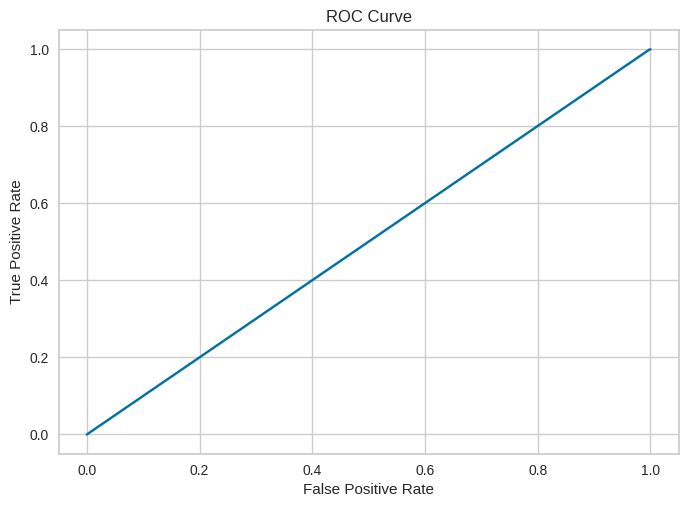

In [ ]:
y_pred_proba = model.predict(x_test)
print("y_pred_proba shape:", y_pred_proba.shape)
print("y_test shape:", y_test.shape)
y_pred_proba = y_pred_proba.ravel()
print("errors :",(y_pred_proba!=y_test).sum())
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

After building all the models and upon evaluating the metrics like precesion, F1 score and AUC, we got the best prediction model from Isolation forest algorithm among all. 